In [1]:
import Le_Module.Utilities.FinUtils as fu
from Le_Module.Utilities.DataClasses import *
from Le_Module.PredictorsManagement import *
from Le_Module.StrategiesManagement import *
from Le_Module.PaperworkManagement import *
import keras
from keras import layers
import tensorflow as tf
from tinkoff.invest import CandleInterval, CandleInstrument, SubscriptionInterval, Client, InstrumentIdType, OrderType
import time
import matplotlib.pyplot as plt
import numpy as np

figi = 'BBG004S68B31'
token = '______'
budget = 100000
acc_id1 = '______'


def sceduler(epoch, lr):
    if epoch < 200:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lrs0 = [layers.Dense(5, activation='LeakyReLU'),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(64, activation='LeakyReLU'),
        layers.Dense(64, activation='LeakyReLU'),
        layers.Dense(1, activation='LeakyReLU'),]

lrs1 = [layers.LSTM(1024, input_shape=[11, 5], return_sequences=True, activation='LeakyReLU'),
        layers.BatchNormalization(),
        layers.LSTM(1024, return_sequences=True, activation='LeakyReLU'),
        layers.Conv1D(64, kernel_size=2, strides=(2), padding='valid', activation='LeakyReLU'),
        layers.Conv1D(64, kernel_size=2, strides=(2), padding='valid', activation='LeakyReLU'),
        layers.Conv1D(32, kernel_size=2, strides=(2), padding='valid', activation='LeakyReLU'),
        layers.Dense(1, activation='relu')]

lrs2 = [layers.Dense(5, input_shape=[5, 11], activation='LeakyReLU'),
        layers.BatchNormalization(),
        layers.Conv1D(64, kernel_size=2, strides=(2), activation='sigmoid'),
        layers.Conv1D(64, kernel_size=2, strides=(2), activation='sigmoid'),
        layers.Flatten(),
        layers.Dense(64, activation='LeakyReLU'),
        layers.Dense(1, activation='LeakyReLU')]

input_len = 5
nepochs = 280

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, restore_best_weights=True)
lrscheduler = keras.callbacks.LearningRateScheduler(sceduler)

In [2]:
tha_ = fu.createdataset_tinkoff(fu.get_data_tinkoff(TOKEN=token, FIGI=figi, period=1, interval=CandleInterval.CANDLE_INTERVAL_5_MIN))

factory = Factories.AIPredictorFactory([tha_])

c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
class my_condition(market_condition):
    def __call__(self, c: Candles) -> bool:
        return c.MAs[0] > c.Close

In [4]:
g = my_condition()
g(tha_)

True

In [5]:
tha_

Candles(Open=Indicator(name='open', values=array([70.99, 71.02, 70.99, 70.85, 70.84, 70.92, 70.88, 70.92, 70.87,
       70.91, 70.89, 70.89, 70.9 , 70.88, 70.92, 70.96, 70.95, 70.97,
       70.94, 70.92, 70.89, 70.94, 70.85, 70.82, 70.77, 70.53, 70.55,
       70.62, 70.6 , 70.49, 70.42, 70.48, 70.44, 70.64, 70.63, 70.53,
       70.66, 70.63, 70.64, 70.63, 70.66, 70.67, 70.67, 70.66, 70.66,
       70.62, 70.62, 70.65, 70.62, 70.6 , 70.6 , 70.6 , 70.62, 70.64,
       70.61, 70.63, 70.74, 70.7 , 70.72, 70.75, 70.76, 70.71, 70.72,
       70.71, 70.68, 70.64, 70.65, 70.63, 70.63, 70.62, 70.62, 70.62,
       70.64, 70.65, 70.65, 70.59, 70.6 , 70.6 , 70.6 , 70.58, 70.58,
       70.6 , 70.6 , 70.6 , 70.59, 70.58, 70.59, 70.58, 70.59, 70.57,
       70.6 , 70.64, 70.57, 70.49, 70.56, 70.55, 70.75, 70.93, 71.02,
       71.08, 71.09, 71.12, 71.11, 71.11, 71.35, 71.4 , 71.47, 71.33,
       71.27, 71.34, 71.3 , 71.16, 71.16, 71.2 , 71.21, 71.23, 71.28,
       71.28, 71.26, 71.19, 71.2 , 71.14, 71.08

In [6]:
samples, labels = fu.get_training_data(tha_, predictable=g)

In [7]:
print(tha_.Close)

Indicator(name='close', values=array([71.  , 70.97, 70.84, 70.85, 70.92, 70.88, 70.92, 70.88, 70.91,
       70.87, 70.89, 70.9 , 70.88, 70.92, 70.95, 70.97, 70.97, 70.94,
       70.92, 70.89, 70.9 , 70.84, 70.84, 70.77, 70.53, 70.55, 70.63,
       70.6 , 70.5 , 70.42, 70.48, 70.56, 70.44, 70.64, 70.56, 70.66,
       70.65, 70.64, 70.62, 70.66, 70.67, 70.69, 70.67, 70.66, 70.62,
       70.65, 70.65, 70.62, 70.59, 70.59, 70.62, 70.62, 70.61, 70.62,
       70.64, 70.74, 70.7 , 70.72, 70.74, 70.74, 70.71, 70.76, 70.72,
       70.69, 70.65, 70.66, 70.62, 70.62, 70.61, 70.62, 70.64, 70.63,
       70.64, 70.65, 70.58, 70.6 , 70.6 , 70.6 , 70.58, 70.56, 70.6 ,
       70.6 , 70.6 , 70.58, 70.59, 70.59, 70.58, 70.59, 70.57, 70.6 ,
       70.64, 70.58, 70.48, 70.58, 70.52, 70.75, 70.94, 71.02, 71.08,
       71.09, 71.12, 71.12, 71.12, 71.34, 71.41, 71.47, 71.33, 71.3 ,
       71.31, 71.3 , 71.17, 71.15, 71.22, 71.21, 71.23, 71.29, 71.28,
       71.26, 71.19, 71.2 , 71.15, 71.08, 71.03, 71.  , 71.

In [11]:
prs = []

for i in range(1, 6):
    p =  Predictors.PredictorParams(loss=keras.losses.Huber(),
                                    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                                    structure=lrs2,
                                    input_len=input_len,
                                    scope=i,
                                    output_len=1,
                                    callbacks=[lrscheduler, earlystop],
                                    epochs=nepochs//2,
                                    validation_split=0.2)
    prs.append(factory.construct_predictor(p))

c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


examining predictor's bias:
|████████████████████████████████████████| 2874/2874 [100%] in 2:19.0 (20.68/s) 
predictor's bias based on average square deviation from true values: (-0.0030433133, 0.0018153185)
predictor's bias based on median deviation from true values: (-0.0029702452, 0.0018153185)


c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


examining predictor's bias:
|████████████████████████████████████████| 2873/2873 [100%] in 2:19.4 (20.61/s) 
predictor's bias based on average square deviation from true values: (-0.0011365926, 0.0015246526)
predictor's bias based on median deviation from true values: (-0.00077943073, 0.0015246526)


c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


examining predictor's bias:
|████████████████████████████████████████| 2872/2872 [100%] in 2:20.9 (20.38/s) 
predictor's bias based on average square deviation from true values: (-0.0012401419, 0.001627556)
predictor's bias based on median deviation from true values: (-0.00084574375, 0.001627556)


c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


examining predictor's bias:
|████████████████████████████████████████| 2871/2871 [100%] in 2:19.8 (20.54/s) 
predictor's bias based on average square deviation from true values: (-0.0014135012, 0.0017220138)
predictor's bias based on median deviation from true values: (-0.0009956094, 0.0017220138)


c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


examining predictor's bias:
|████████████████████████████████████████| 2870/2870 [100%] in 2:19.9 (20.51/s) 
predictor's bias based on average square deviation from true values: (-0.0014970308, 0.0019039201)
predictor's bias based on median deviation from true values: (-0.0010614782, 0.0019039201)


|███████████████████████████████████████▉⚠︎ (!) 2873/2878 [100%] in 2:28.1 (19.40


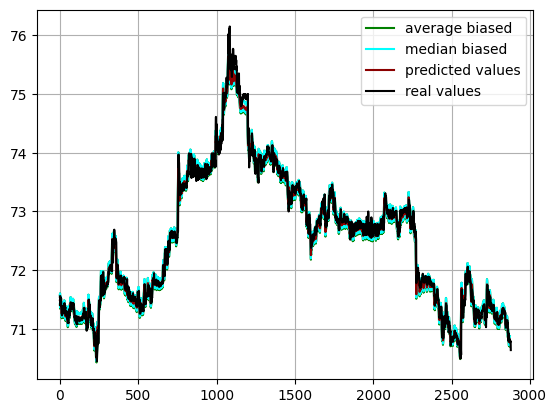

In [26]:
predictor2.see_performance(tha_)

In [4]:
atr_rm = RiskManagers.ATRRiskManager()
s = sm.Squad(Predictors=[p for p in prs], RiskManagers=[atr_rm])
provizor = sm.Provizor(s)
deci = DecidingModules.SimpleAIDecidingModule()
quant = QuantityControllers.AIQuantityControllerTPR2()#AIQuantityControllerTPR1()  
siggen = sm.SignalGenerator(deci, quant, provizor)

stratparams = sm.StrategyParams(SignalGenerator=siggen, TOKEN=token, FIGI = figi, Budget=budget, Backtest=True, Intervals=[CandleInterval.CANDLE_INTERVAL_5_MIN])

In [5]:
instruments = [CandleInstrument(figi=figi, interval=CandleInterval.CANDLE_INTERVAL_5_MIN)]

bridge = Bridges.CandlesBridge(token = token, acc_id = acc_id1, candle_instruments = instruments, waiting_close=True)

bot = sm.AutomatedStrategy(params=stratparams) 

In [12]:
for n in range(5, len(tha_.as_dataframe())//3):
    batch = fu.DatabitsBatch(for_predictors=tha_[n-5 : n], for_risk_managers=tha_[n-5 : n])
    print(bot.decide(batch, transparency=True))

[DecisionsBatch(market=Decision(direction=True, amount=3, type=0, price=-1), stop_loss=Decision(direction=False, amount=-1, type=1, price=71.47260334235736), take_profit=None), DatabitsBatch(for_predictors=Candles(Open=Indicator(name='open', values=array([71.54, 71.52, 71.51, 71.51, 71.5 ]), span=[0]), Close=Indicator(name='close', values=array([71.33, 71.38, 71.51, 71.38, 71.51]), span=[0]), High=Indicator(name='high', values=array([71.54, 71.52, 71.52, 71.51, 71.51]), span=[0]), Low=Indicator(name='low', values=array([71.32, 71.38, 71.39, 71.38, 71.5 ]), span=[0]), Volume=Indicator(name='volume', values=array([2982,   14,   12,   34,    4]), span=[0]), MAs=[Indicator(name='moving average', values=array([71.4525, 71.463 , 71.4625, 71.457 , 71.458 ]), span=[20]), Indicator(name='moving average', values=array([71.4784, 71.4804, 71.4838, 71.4844, 71.4878]), span=[50])], MACDhist=Indicator(name='MACD histogram', values=array([-0.00674422, -0.00171694,  0.00066688,  0.00190551,  0.00171892

In [13]:
max(bot.history['PnL'])

100000

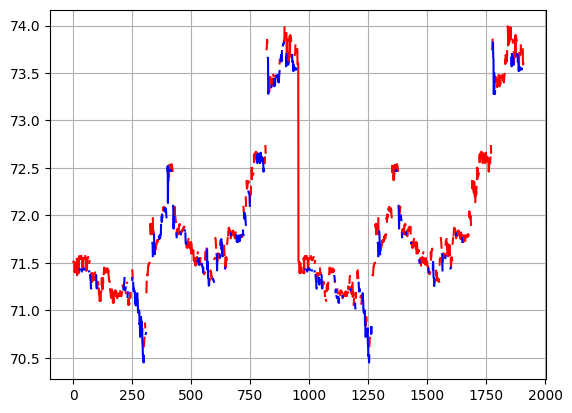

In [14]:
plt.plot(bot.history['Buy prices'][1:], 'r')
plt.plot(bot.history['Market sell prices'], 'b')
plt.grid(True)
plt.show()   #So here i stumbled upon a thought that just ai might be not so good for actual market decisions

In [8]:
plt.plot(bot.history['PnL'], 'r') #So here i stumbled upon a thought that just ai might be not so good for actual market decisions

NameError: name 'bot' is not defined

In [8]:
kinda_backtest_stats = []

for i in range(3):
    beginning = time.time()
    
    db_ = fu.createdataset_tinkoff(fu.get_data_tinkoff(token, FIGI=figi, period=1, interval=CandleInterval.CANDLE_INTERVAL_3_MIN))
    db = fu.DatabitsBatch(for_predictors=db_[-5:], for_trendviewers=db_[-5:], for_risk_managers=db_[-5:])
    thig = bot.decide(db, transparency=True)
    
    print(f'\nstep done at time: {time.time()}\n\n\n')
    
    end = time.time()
    print(thig)
    time.sleep(3*60 - (end - beginning))

c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\gelos\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



step done at time: 1706208962.2334669



